# Desarrollo de un Sistema de Análisis de Noticias Salvadoreñas

## Objetivo General

El objetivo principal de este proyecto es aplicar los fundamentos de ciencia de datos para desarrollar un sistema integral de análisis de noticias salvadoreñas. Se abordarán diferentes etapas, desde la obtención de datos mediante web scraping hasta la implementación de modelos de aprendizaje automático y procesamiento del lenguaje natural, culminando con la creación de una interfaz interactiva utilizando Streamlit.


### Han contribuido a la elaboracion de este proyecto:

1. Nathaly Rebeca Bonilla Morales - UCA
2. Elmer Elias Chanchan - UFG
3. Diego Alejandro Manzano Pineda - Lab-Dat


# Importar las librerías necesarias

In [ ]:
import pandas as pd #libreria para manipulación y análisis de datos. Se usa para cargar, manipular y analizar datos en formatos csv, excel, etc.
import matplotlib.pyplot as plt #una librería para la visualización de gráficos en Python.
import re #Las expresiones regulares son patrones de cadenas de caracteres utilizados para la búsqueda de coincidencias y manipulaciones de texto basadas en patrones específicos.
from collections import Counter #Es especialmente útil en tareas de procesamiento de lenguaje natural y análisis de datos para contar la frecuencia de aparición de elementos.
from wordcloud import WordCloud #Librería útil para la creación de nubes de palabras
import itertools

In [ ]:
#Cargar datos
file_path = '/content/datos_noticias.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data.shape

(527, 8)

In [ ]:
data.head(10)

,Titulo,Resumen,Autor,Fecha,Noticia,Keywords,URL,Categoria
0,Comisión avala iniciativa para legalizar propi...,22 familias se verían beneficiadas se continua...,Jessica García,"Dec 11, 2023- 14:01",La Comisión de Obras Públicas y Transporte ava...,"Asamblea Legislativa, Ayudas Familiares, Polít...",https://www.elsalvador.com/noticias/nacional/a...,nacional
1,Conductor ebrio atropelló a señor que estaba e...,José Roberto L. L. fue detenido al resultar co...,Emilce Rivera,"Dec 11, 2023- 10:55","Un hombre fue detenido ayer, en horas de la no...","Accidentes, Accidentes De Tráfico, Atropellos ...",https://www.elsalvador.com/noticias/nacional/a...,nacional
2,El caso de Duval Mata evidencia las arbitrarie...,Dos juzgados especializados han ordenado la li...,Lissette Lemus,"Dec 11, 2023- 06:00",El rostro de José Duval Mata Alvarado se ha co...,"Derechos Humanos, El Salvador, Regimen De Exce...",https://www.elsalvador.com/noticias/nacional/c...,nacional
3,Fiscalía ha ordenado dos veces la libertad par...,El Ministerio Público alega que no tienen elem...,Lissette Lemus,"Dec 10, 2023- 22:35",El cansancio y la angustia es evidente en el r...,"Dirección De Centros Penales, El Salvador, Fis...",https://www.elsalvador.com/noticias/nacional/f...,nacional
4,El gobierno de Milei revisará contrataciones p...,El nuevo gobierno de Argentina anunció auditor...,EFE,"Dec 11, 2023- 09:47",El Gobierno argentino revisará todas las contr...,"Argentina, Economía, Internacional, Javier Milei",https://www.elsalvador.com/noticias/internacio...,internacional
5,"Según Hamás: Al menos 17,700 personas han muer...",Sube la intensidad de los enfrentamientos entr...,AFP,"Dec 10, 2023- 12:02",El ejército israelí libró feroces combates con...,"Grupo Terrorista Hamás, Guerra, Hamás, Interna...",https://www.elsalvador.com/noticias/internacio...,internacional
6,Al menos 11 muertos en enfrentamiento en el ce...,Según la prensa mexicana el enfrentamiento ocu...,AFP,"Dec 08, 2023- 18:19",Al menos 11 personas murieron este viernes en ...,"Crimen Organizado, Internacional, México, Viol...",https://www.elsalvador.com/noticias/internacio...,internacional
7,La Fiscalía de Guatemala dice que las eleccion...,Desde que Arévalo ganó el 25 de junio de forma...,EFE,"Dec 08, 2023- 15:56",El Ministerio Público (Fiscalía) de Guatemala ...,"Crisis En Guatemala, Internacional",https://www.elsalvador.com/noticias/internacio...,internacional
8,Ciudadanos pagaron $116.7 millones más en impu...,El Ministerio de Hacienda había presupuestado ...,Katlen Urquilla,"Dec 11, 2023- 06:00",Los contribuyentes aportaron en noviembre más ...,"Canasta Básica, Impuesto Sobre La Renta, Impue...",https://www.elsalvador.com/noticias/negocios/m...,negocios
9,Bukele usó gráfica de un tercero para reportar...,La información corresponde a la web nayibtrack...,Moisés Alvarado,"Dec 05, 2023- 22:02",Nayib Bukele publicó este lunes datos sobre el...,"Bitcoin, Compras Públicas, El Salvador, Nayib ...",https://www.elsalvador.com/noticias/negocios/e...,negocios


# **Preprocesamiento del Texto:**
Primero, necesitas limpiar y preparar los textos de las columnas 'Titulo' y 'Resumen' para el análisis.

In [ ]:
stopwords_es_expanded = set([
    "a", "al", "algo", "algunas", "algunos", "ante", "antes", "como", "con", "contra", "cual", "cuando", "de", "del", "desde",
    "donde", "durante", "e", "el", "ella", "ellas", "ello", "ellos", "en", "entre", "era", "erais", "eran", "eras", "eres",
    "es", "esa", "esas", "ese", "eso", "esos", "esta", "estaba", "estabais", "estaban", "estabas", "estad", "estada", "estadas",
    "estado", "estados", "estamos", "estando", "estar", "estaremos", "estará", "estarán", "estarás", "estaré", "estaréis",
    "estaría", "estaríais", "estaríamos", "estarían", "estarías", "estas", "este", "estemos", "esto", "estos", "estoy",
    "estuve", "estuviera", "estuvierais", "estuvieran", "estuvieras", "estuvieron", "estuviese", "estuvieseis", "estuviesen",
    "estuvieses", "estuvimos", "estuviste", "estuvisteis", "estuvo", "fue", "fuera", "fuerais", "fueran", "fueras", "fueron",
    "fuese", "fueseis", "fuesen", "fueses", "fui", "fuimos", "fuiste", "fuisteis", "han", "has", "hasta", "hay", "haya",
    "hayamos", "hayan", "hayas", "hayáis", "he", "hemos", "hube", "hubiera", "hubierais", "hubieran", "hubieras", "hubieron",
    "hubiese", "hubieseis", "hubiesen", "hubieses", "hubimos", "hubiste", "hubisteis", "hubo", "la", "las", "le", "les", "lo",
    "los", "me", "mi", "mis", "mucho", "muchos", "muy", "más", "mí", "mía", "mías", "mío", "míos", "nada", "ni", "no", "nos",
    "nosotras", "nosotros", "nuestra", "nuestras", "nuestro", "nuestros", "o", "os", "otra", "otras", "otro", "otros", "para",
    "pero", "poco", "por", "porque", "que", "quien", "quienes", "qué", "se", "sea", "seamos", "sean", "seas", "seremos",
    "será", "serán", "serás", "seré", "seréis", "sería", "seríais", "seríamos", "serían", "serías", "seáis", "si", "sido",
    "siendo", "sin", "sobre", "sois", "somos", "son", "soy", "su", "sus", "suya", "suyas", "suyo", "suyos", "sí", "también",
    "tanto", "te", "tendremos", "tendrá", "tendrán", "tendrás", "tendré", "tendréis", "tendría", "tendríais", "tendríamos",
    "tendrían", "tendrías", "tened", "tenemos", "tenga", "tengamos", "tengan", "tengas", "tengo", "tengáis", "tenida", "tenidas",
    "tenido", "tenidos", "teniendo", "tenéis", "tenía", "teníais", "teníamos", "tenían", "tenías", "ti", "tiene", "tienen",
    "tienes", "todo", "todos", "tu", "tus", "tuve", "tuviera", "tuvierais", "tuvieran", "tuvieras", "tuvieron", "tuviese",
    "tuvieseis", "tuviesen", "tuvieses", "tuvimos", "tuviste", "tuvisteis", "tuvo", "tuya", "tuyas", "tuyo", "tuyos", "tú",
    "un", "una", "uno", "unos", "vosotras", "vosotros", "vuestra", "vuestras", "vuestro", "vuestros", "y", "ya", "yo", "él",
    "éramos"
])

# Función de limpieza y tokenización básica
def clean_and_tokenize(text):
    # Convertir a minúsculas y eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenización simple por espacios
    tokens = text.split()
    return tokens

# Aplicando la función de limpieza y tokenización a las columnas de Titulo y Resumen
data['Titulo_tokens'] = data['Titulo'].apply(clean_and_tokenize)
data['Resumen_tokens'] = data['Resumen'].apply(clean_and_tokenize)

# Juntando todos los tokens para cada columna
all_titulo_tokens = list(itertools.chain(*data['Titulo_tokens']))
all_resumen_tokens = list(itertools.chain(*data['Resumen_tokens']))

# Filtrando stopwords de las listas de tokens
filtered_titulo_tokens = [w for w in all_titulo_tokens if w not in stopwords_es_expanded]
filtered_resumen_tokens = [w for w in all_resumen_tokens if w not in stopwords_es_expanded]


In [ ]:
data.head(10)

,Titulo,Resumen,Autor,Fecha,Noticia,Keywords,URL,Categoria,Titulo_tokens,Resumen_tokens
0,Comisión avala iniciativa para legalizar propi...,22 familias se verían beneficiadas se continua...,Jessica García,"Dec 11, 2023- 14:01",La Comisión de Obras Públicas y Transporte ava...,"Asamblea Legislativa, Ayudas Familiares, Polít...",https://www.elsalvador.com/noticias/nacional/a...,nacional,"[comisión, avala, iniciativa, para, legalizar,...","[22, familias, se, verían, beneficiadas, se, c..."
1,Conductor ebrio atropelló a señor que estaba e...,José Roberto L. L. fue detenido al resultar co...,Emilce Rivera,"Dec 11, 2023- 10:55","Un hombre fue detenido ayer, en horas de la no...","Accidentes, Accidentes De Tráfico, Atropellos ...",https://www.elsalvador.com/noticias/nacional/a...,nacional,"[conductor, ebrio, atropelló, a, señor, que, e...","[josé, roberto, l, l, fue, detenido, al, resul..."
2,El caso de Duval Mata evidencia las arbitrarie...,Dos juzgados especializados han ordenado la li...,Lissette Lemus,"Dec 11, 2023- 06:00",El rostro de José Duval Mata Alvarado se ha co...,"Derechos Humanos, El Salvador, Regimen De Exce...",https://www.elsalvador.com/noticias/nacional/c...,nacional,"[el, caso, de, duval, mata, evidencia, las, ar...","[dos, juzgados, especializados, han, ordenado,..."
3,Fiscalía ha ordenado dos veces la libertad par...,El Ministerio Público alega que no tienen elem...,Lissette Lemus,"Dec 10, 2023- 22:35",El cansancio y la angustia es evidente en el r...,"Dirección De Centros Penales, El Salvador, Fis...",https://www.elsalvador.com/noticias/nacional/f...,nacional,"[fiscalía, ha, ordenado, dos, veces, la, liber...","[el, ministerio, público, alega, que, no, tien..."
4,El gobierno de Milei revisará contrataciones p...,El nuevo gobierno de Argentina anunció auditor...,EFE,"Dec 11, 2023- 09:47",El Gobierno argentino revisará todas las contr...,"Argentina, Economía, Internacional, Javier Milei",https://www.elsalvador.com/noticias/internacio...,internacional,"[el, gobierno, de, milei, revisará, contrataci...","[el, nuevo, gobierno, de, argentina, anunció, ..."
5,"Según Hamás: Al menos 17,700 personas han muer...",Sube la intensidad de los enfrentamientos entr...,AFP,"Dec 10, 2023- 12:02",El ejército israelí libró feroces combates con...,"Grupo Terrorista Hamás, Guerra, Hamás, Interna...",https://www.elsalvador.com/noticias/internacio...,internacional,"[según, hamás, al, menos, 17700, personas, han...","[sube, la, intensidad, de, los, enfrentamiento..."
6,Al menos 11 muertos en enfrentamiento en el ce...,Según la prensa mexicana el enfrentamiento ocu...,AFP,"Dec 08, 2023- 18:19",Al menos 11 personas murieron este viernes en ...,"Crimen Organizado, Internacional, México, Viol...",https://www.elsalvador.com/noticias/internacio...,internacional,"[al, menos, 11, muertos, en, enfrentamiento, e...","[según, la, prensa, mexicana, el, enfrentamien..."
7,La Fiscalía de Guatemala dice que las eleccion...,Desde que Arévalo ganó el 25 de junio de forma...,EFE,"Dec 08, 2023- 15:56",El Ministerio Público (Fiscalía) de Guatemala ...,"Crisis En Guatemala, Internacional",https://www.elsalvador.com/noticias/internacio...,internacional,"[la, fiscalía, de, guatemala, dice, que, las, ...","[desde, que, arévalo, ganó, el, 25, de, junio,..."
8,Ciudadanos pagaron $116.7 millones más en impu...,El Ministerio de Hacienda había presupuestado ...,Katlen Urquilla,"Dec 11, 2023- 06:00",Los contribuyentes aportaron en noviembre más ...,"Canasta Básica, Impuesto Sobre La Renta, Impue...",https://www.elsalvador.com/noticias/negocios/m...,negocios,"[ciudadanos, pagaron, 1167, millones, más, en,...","[el, ministerio, de, hacienda, había, presupue..."
9,Bukele usó gráfica de un tercero para reportar...,La información corresponde a la web nayibtrack...,Moisés Alvarado,"Dec 05, 2023- 22:02",Nayib Bukele publicó este lunes datos sobre el...,"Bitcoin, Compras Públicas, El Salvador, Nayib ...",https://www.elsalvador.com/noticias/negocios/e...,negocios,"[bukele, u

## **Filtrado de Stopwords**
Eliminé las stopwords de las listas de tokens.

In [ ]:
# Filtrando stopwords de las listas de tokens
filtered_titulo_tokens = [w for w in all_titulo_tokens if w not in stopwords_es_expanded]
filtered_resumen_tokens = [w for w in all_resumen_tokens if w not in stopwords_es_expanded]

# Conteo de palabras sin stopwords
filtered_titulo_freq = Counter(filtered_titulo_tokens)
filtered_resumen_freq = Counter(filtered_resumen_tokens)

## **Generación de Nubes de Palabras**
Utilicé la biblioteca WordCloud para generar y mostrar las nubes de palabras para los títulos y resúmenes filtrados.

In [ ]:
# Función para crear y mostrar nube de palabras
def show_wordcloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

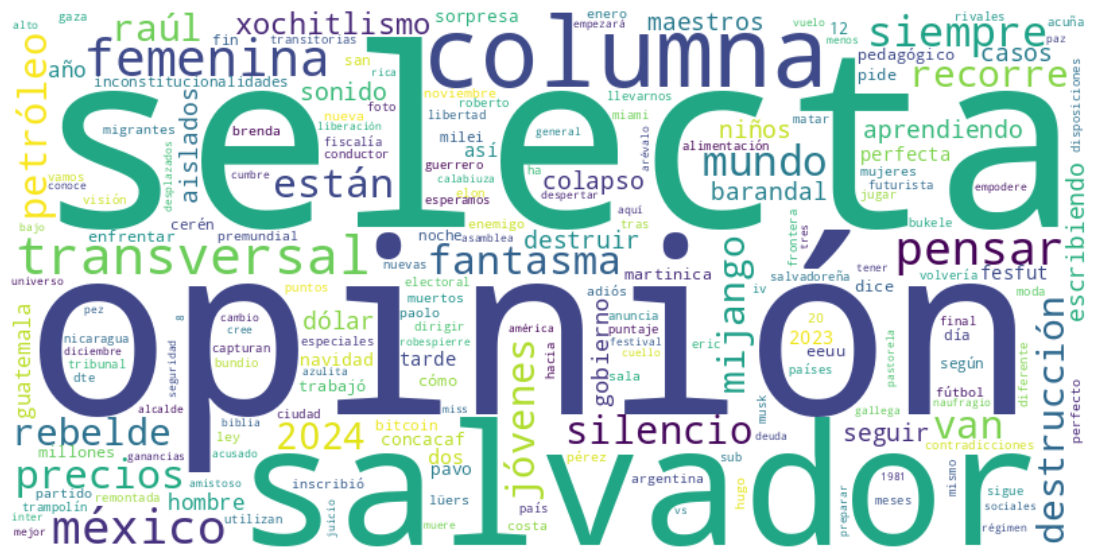

In [ ]:
# Generar y mostrar nube de palabras sin stopwords para Titulo
show_wordcloud(filtered_titulo_freq)

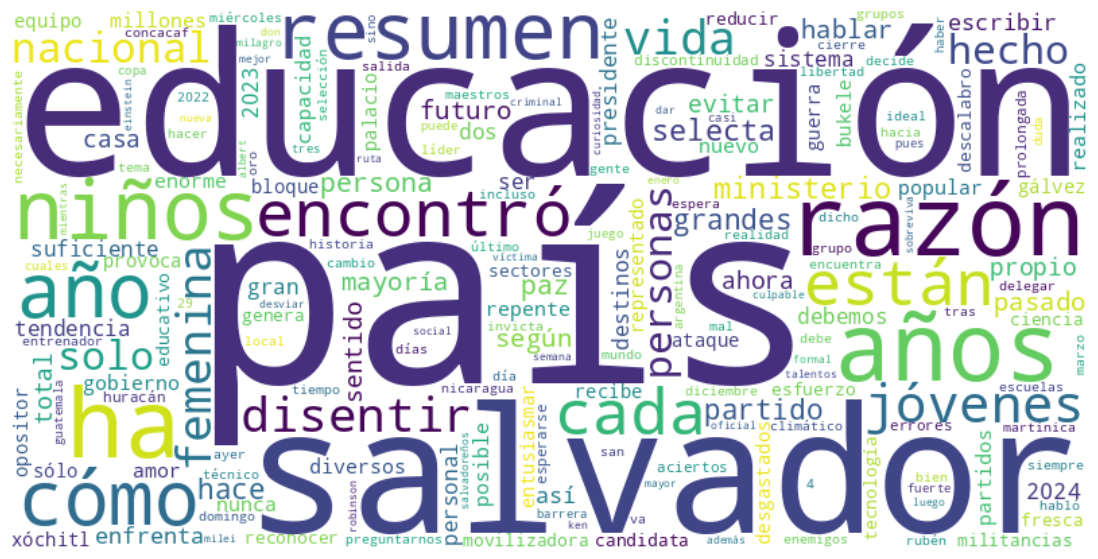

In [ ]:
# Generar y mostrar nube de palabras sin stopwords para Resumen
show_wordcloud(filtered_resumen_freq)

## Análisis de sentimientos

In [ ]:
pip install sentiment-analysis-spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 31.7 MB/s eta 0:00:00


In [ ]:
from sentiment_analysis_spanish import sentiment_analysis # Varia de 0 a 1, mas cercano a 1 positivo, mas cercano a 0, negativo.

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
def sentimiento(text):
  if pd.notna(text):
      return sentiment.sentiment(text)
  else:
      return text

In [ ]:
def categorize(number_value):
    if number_value > 0.6:
      return 'Positivo'
    elif number_value < 0.4:
      return 'Negativo'
    else:
      return 'Neutral'

In [ ]:
data['sentimiento_summary'] = data['Resumen'].apply(lambda x: sentimiento(x))
data['sentimiento_summary_cat'] = data['sentimiento_summary'].apply(lambda x: categorize(x))

In [ ]:
data.head(40)

,Titulo,Resumen,Autor,Fecha,Noticia,Keywords,URL,Categoria,sentimiento_summary,sentimiento_summary_cat
0,Comisión avala iniciativa para legalizar propi...,22 familias se verían beneficiadas se continua...,Jessica García,"Dec 11, 2023- 14:01",La Comisión de Obras Públicas y Transporte ava...,"Asamblea Legislativa, Ayudas Familiares, Polít...",https://www.elsalvador.com/noticias/nacional/a...,nacional,4.722156e-01,Neutral
1,Conductor ebrio atropelló a señor que estaba e...,José Roberto L. L. fue detenido al resultar co...,Emilce Rivera,"Dec 11, 2023- 10:55","Un hombre fue detenido ayer, en horas de la no...","Accidentes, Accidentes De Tráfico, Atropellos ...",https://www.elsalvador.com/noticias/nacional/a...,nacional,1.238632e-03,Negativo
2,El caso de Duval Mata evidencia las arbitrarie...,Dos juzgados especializados han ordenado la li...,Lissette Lemus,"Dec 11, 2023- 06:00",El rostro de José Duval Mata Alvarado se ha co...,"Derechos Humanos, El Salvador, Regimen De Exce...",https://www.elsalvador.com/noticias/nacional/c...,nacional,7.224420e-03,Negativo
3,Fiscalía ha ordenado dos veces la libertad par...,El Ministerio Público alega que no tienen elem...,Lissette Lemus,"Dec 10, 2023- 22:35",El cansancio y la angustia es evidente en el r...,"Dirección De Centros Penales, El Salvador, Fis...",https://www.elsalvador.com/noticias/nacional/f...,nacional,2.997866e-07,Negativo
4,El gobierno de Milei revisará contrataciones p...,El nuevo gobierno de Argentina anunció auditor...,EFE,"Dec 11, 2023- 09:47",El Gobierno argentino revisará todas las contr...,"Argentina, Economía, Internacional, Javier Milei",https://www.elsalvador.com/noticias/internacio...,internacional,7.806806e-01,Positivo
5,"Según Hamás: Al menos 17,700 personas han muer...",Sube la intensidad de los enfrentamientos entr...,AFP,"Dec 10, 2023- 12:02",El ejército israelí libró feroces combates con...,"Grupo Terrorista Hamás, Guerra, Hamás, Interna...",https://www.elsalvador.com/noticias/internacio...,internacional,3.217874e-02,Negativo
6,Al menos 11 muertos en enfrentamiento en el ce...,Según la prensa mexicana el enfrentamiento ocu...,AFP,"Dec 08, 2023- 18:19",Al menos 11 personas murieron este viernes en ...,"Crimen Organizado, Internacional, México, Viol...",https://www.elsalvador.com/noticias/internacio...,internacional,6.967946e-04,Negativo
7,La Fiscalía de Guatemala dice que las eleccion...,Desde que Arévalo ganó el 25 de junio de forma...,EFE,"Dec 08, 2023- 15:56",El Ministerio Público (Fiscalía) de Guatemala ...,"Crisis En Guatemala, Internacional",https://www.elsalvador.com/noticias/internacio...,internacional,1.166162e-02,Negativo
8,Ciudadanos pagaron $116.7 millones más en impu...,El Ministerio de Hacienda había presupuestado ...,Katlen Urquilla,"Dec 11, 2023- 06:00",Los contribuyentes aportaron en noviembre más ...,"Canasta Básica, Impuesto Sobre La Renta, Impue...",https://www.elsalvador.com/noticias/negocios/m...,negocios,2.113855e-04,Negativo
9,Bukele usó gráfica de un tercero para reportar...,La información corresponde a la web nayibtrack...,Moisés Alvarado,"Dec 05, 2023- 22:02",Nayib Bukele publicó este lunes datos sobre el...,"Bitcoin, Compras Públicas, El Salvador, Nayib ...",https://www.elsalvador.com/noticias/negocios/e...,negocios,1.045774e-05,Negativo


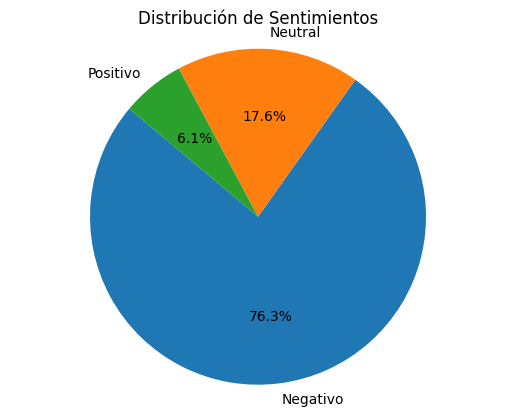

In [ ]:
# Contar las ocurrencias de cada categoría
conteo_categorias = data['sentimiento_summary_cat'].value_counts()

# Crear un gráfico de pastel
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=140)

# Igualar aspecto para que se vea como un círculo
plt.axis('equal')

# Título del gráfico
plt.title('Distribución de Sentimientos')

# Mostrar el gráfico
plt.show()